<a href="https://colab.research.google.com/github/Muhammad0Awais/AMLLabs/blob/main/Awais_Midterm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Midterm Lab
```
- Advanced Machine Learning, Innopolis University 
- Professor: Muhammad Fahim 
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

```
Tasks:
  1. Image Transform (5 points)
  2. CNN model declaration (10 points)
  3. CNN model training (5 points)
  4. Transfer Learning or Viterbi algorithm : Bonus (5 points)
```

<hr>

## The Dataset

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Task 1 : Preprocessing of Dataset (5 points)

1.   Create the transforms:
    * Resize images to (32 * 32)
    * Normalize every channel (mean and std of your choice)
    * Apply one more data augmentation technique you know (i.e Rotation, translation, RandomErasing, RandomHorizontalFlip etc.)


**Hint**: data augmentation techniques shouldn't be applied to the test dataset.

In [5]:
import random

class RandomRotation(object):
  def __init__(self):
    self.degree = random.randrange(-90,90)
  def __call__(self, img):
    return img.rotate(self.degree)
  
transform_train = transforms.Compose([
                transforms.Resize((32, 32)),
                RandomRotation(),
                transforms.ToTensor(),
                
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            ])

transform_test = None 

trainset = torchvision.datasets.SVHN(root='./data/train', split="train", download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=1)

testset = torchvision.datasets.SVHN(root='./data/test', split="test", download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=1)

classes = [f"{i}" for i in np.unique(trainset.labels)]

Using downloaded and verified file: ./data/train/train_32x32.mat
Using downloaded and verified file: ./data/test/test_32x32.mat


In [23]:
unique, counts = np.unique(trainset.labels, return_counts=True)
print(counts)

[ 4948 13861 10585  8497  7458  6882  5727  5595  5045  4659]


## Task 1.1 Plot Classes distribution 

Plot the distribution of classes in the training sample on a bar graph

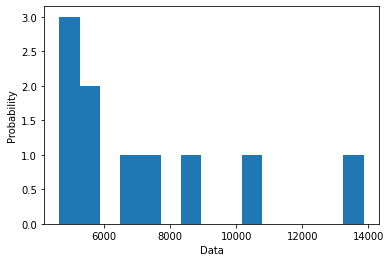

In [34]:
from matplotlib import pyplot as plt


# histValues=[0]*10

# for label in trainloader.dataset.labels:
#   histValues[label] +=1

# print(histValues)

unique, counts = np.unique(trainset.labels, return_counts=True)

# plt.hist(counts)
plt.hist(counts, bins=15)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');
# plt.hist()
#TODO: Plot the distribution of classes

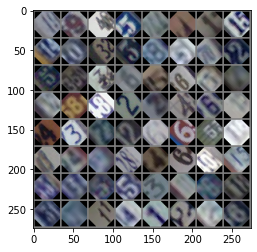

In [35]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 3, 32, 32)
    return x

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# sample a batch and show 
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


## Task 2 : Build a classisfication convolutional neural network


The Model should should have the following achitecture : 
1. 3 Convolution layers : (5 points)
    * conv1 : 2 kernels, 3*3 kernel size, stride 1.
    * conv2 : 4 kernels, 5*5 kernel size, stride 2.
    * conv3 : 8 kernels, 3*3 kernel size, stride 1.
    * Add 1 Avarage pooling layer after 2nd layer and 1 Max-pooling layer before the fully connected layers.
    * Stride for all pooling operations set to 1 
    
    
2. Fully connected layers : 
    * fc1 : 64 output-neurons with a relu activation.
    * output_layer : final layer with no activation function
    * Add Dropout layer after the first (fc1) layer with 25% dropout probability

3. Implement the foward pass method for the CNN  (5 points)
    * Add an activation function of your own choice after every layer
    

In [112]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #TODO: Declare the model layers
        self.encoder = nn.Sequential(
          nn.Conv2d(3, 2, 3, 1),
          nn.ReLU(),
          nn.Conv2d(2, 4, 5, 2),
          nn.AvgPool2d(2, stride=1),
          nn.ReLU(),
          nn.Conv2d(4, 8, 3, 1),
          nn.MaxPool2d(2, stride=1),
          nn.ReLU(),
        )
        #TODO
        self.classifier = nn.Sequential(
            nn.Linear(648, 64),
            nn.Dropout(p=0.25),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        # TODO: Implement the forward pass
        print(x.shape)
        x = self.encoder(x)
        x = x.view(x.shape[0], -1)
        print(x.shape)
        x = self.classifier(x)
        return x
        # return #None

## Task 3 : Convolutional neural network training precedure (5 points)

Implement the model training procedure and select the appropriate loss function

In [63]:
model = Net().to(device)
model

Net(
  (encoder): Sequential(
    (0): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(2, 4, kernel_size=(5, 5), stride=(2, 2))
    (3): AvgPool2d(kernel_size=2, stride=1, padding=0)
    (4): ReLU()
    (5): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (6): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=648, out_features=64, bias=True)
    (1): Dropout(p=0.25, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [102]:
# # accuracy_calculator which takes predicted labels and real labels
# def accuracy_calculator(preds, y):
#   """Returns accuracy per batch"""
#   # print(preds.shape)
#   # print(y.shape)
#   # for pred in preds:
#     # print(pred)
#   _, predicted = torch.max(preds, 1)
#   total += y.size(0)
#   correct += (predicted == labels).sum().item()
#   rounded_preds = torch.round(torch.max(preds)) #round predictions to the closest integer
#   # print(rounded_preds)
#   # for idx, v in enumerate(rounded_preds):
    
#   correct = (rounded_preds == y).float()
#   return correct.sum() / len(correct)

In [107]:
#Set hyper parameters 
nb_epoch = 3
lr = 0.001

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss() #TODO: Define the Loss function (criterion)

criterion = criterion.to(device)

def train(model,trainloader,optimizer, criterion, device):
    #TODO : Implement the training procedure of the model at each an every epoch. It should return model loss and accuracy on training sample    
    
    model.train() # do we do this in every epoch or just once for whole training?
    running_loss = 0.0
    epoch_loss = 0.0
    epoch_acc = 0.0

    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs).squeeze(1)
        loss = criterion(outputs, labels)


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        # epoch_acc += acc.item()
          
    return epoch_loss / len(trainloader), correct / total

    #     # print statistics
    #     running_loss += loss.item()
    #     if (i+1) % 500 == 0:    # print every 500 mini-batches
    #         print('[%d, %5d] loss: %.3f' %
    #             (epoch + 1, i + 1, running_loss / 500))
    #         running_loss = 0.0

    # print('Finished Training')
    # return None , None

In [108]:
for epoch in range(nb_epoch):
    epochLoss, epochAcc = train(model,trainloader, optimizer, criterion, device)
    print(f"Epoch : {epoch}, Loss {epochLoss}, Accuracy {epochAcc}")

Epoch : 0, Loss 1.4676150425032237, Accuracy 0.5064908472910439
Epoch : 1, Loss 1.054479754439608, Accuracy 0.6683183859562909
Epoch : 2, Loss 0.9110638788693857, Accuracy 0.7194397804987919


## Task 4 (bonus) : Use pretrained CNN model or Viterbi implementation (5 points)

**Option 1** : Import any pretrained model and train on CIFAR10. Print out the loss and accuracy at each an every epoch. Number of training epochs and optimizer are of your choice. <br>
**OPtion 2** : Implement the viterbi algorithm (from previous lab task POS tagging) 

In [109]:

import torchvision.models as models

transform = transforms.Compose(
    [transforms.Resize((256,256)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [110]:

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = models.resnet18(pretrained=True,progress=True)
        self.net.trainable = False
        self.net.fc = nn.Linear(512, 10)

    def forward(self, x):
        return self.net(x)


net = Net()
net = net.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
for epoch in range(nb_epoch):
    epochLoss, epochAcc = train(net,trainloader, optimizer, criterion, device)
    print(f"Epoch : {epoch}, Loss {epochLoss}, Accuracy {epochAcc}")